# Lista 2 - DSP

## Aluno
João Mário C. I. Lago

In [ ]:
!pip install -q dsp-ifsc numpy pandas matplotlib

## Imports

In [1]:
import numpy as np
from dsp_ifsc.signal import Signal
from dsp_ifsc.system import System

## Ex P2.11 - Linearity check
## Ex P2.12 - Time invariance check

### System 1

$$
T_1[x(n)] = x(n)u(n) \\
$$

In [2]:
sys = System(lambda x: x * Signal.from_step(x.n))

print(f'Is Linear {sys.is_linear}')
print(f'Is Time-Invariant {sys.is_time_invariant}')

Is Linear True
Is Time-Invariant False


### System 2

$$
T_2[x(n)] = x(n) + nx(n + 1) \\
$$

In [3]:
sys = System(lambda x: x + Signal(x.n, x.n) * (x << 1))

print(f'Is Linear {sys.is_linear}')
print(f'Is Time-Invariant {sys.is_time_invariant}')

Is Linear True
Is Time-Invariant False


### System 3

$$
T_3[x(n)] = x(n) + \frac{1}{2}x(n - 2) - \frac{1}{3}x(n - 3)x(2n) \\
$$

In [4]:
sys = System(lambda x: x + (1/2) * (x >> 2) - (1/3) * (x >> 3) * x.scale(2))

print(f'Is Linear {sys.is_linear}')
print(f'Is Time-Invariant {sys.is_time_invariant}')

Is Linear False
Is Time-Invariant False


### System 4

$$
T_4[x(n)] = \sum_{k=-\infty}^{n+5} 2x(k) \\
$$

In [5]:
sys = System(lambda x: 2 * (x @ Signal.from_scalar(1, np.arange(0, x.n.max() + 5)))[:len(x.x)])

print(f'Is Linear {sys.is_linear}')
print(f'Is Time-Invariant {sys.is_time_invariant}')

Is Linear True
Is Time-Invariant False


### Signal 5

$$
T_5[x(n)] = x(2n) \\
$$

In [6]:
sys = System(lambda x: x.scale(2))

print(f'Is Linear {sys.is_linear}')
print(f'Is Time-Invariant {sys.is_time_invariant}')

Is Linear True
Is Time-Invariant False


### Signal 6

$$
T_6[x(n)] = \text{round}[x(n)] \\
$$

In [7]:
sys = System(lambda x: Signal(np.round(x.x), x.n))

print(f'Is Linear {sys.is_linear}')
print(f'Is Time-Invariant {sys.is_time_invariant}')

Is Linear False
Is Time-Invariant True


## Ex P2.15 - Convolution

### System 1

$$
x(n) = \{2, -4, 5, 3, -1, -2, 6\}, h(n) = \{1, -1, 1, -1, 1\}
$$


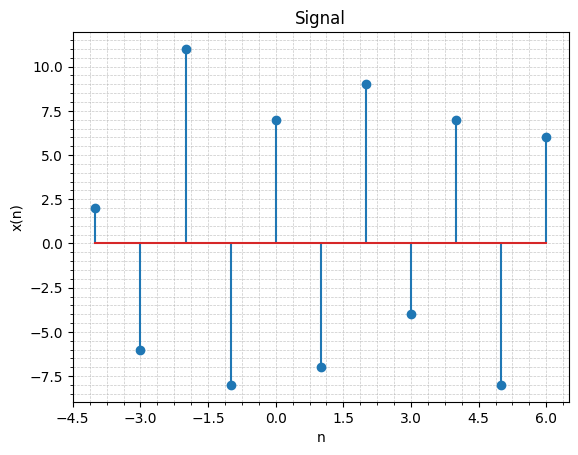

<Axes: title={'center': 'Signal'}, xlabel='n', ylabel='x(n)'>

In [8]:
x = Signal([2, -4, 5, 3, -1, -2, 6], np.arange(-3, 4))
h = Signal([1, -1, 1, -1, 1], np.arange(-1, 4))

x1 = x @ h

x1.stem()

### System 2

$$
x(n) = \{1, 1, 0, 1, 1\}, h(n) = \{1, -2, -3, 4\}
$$


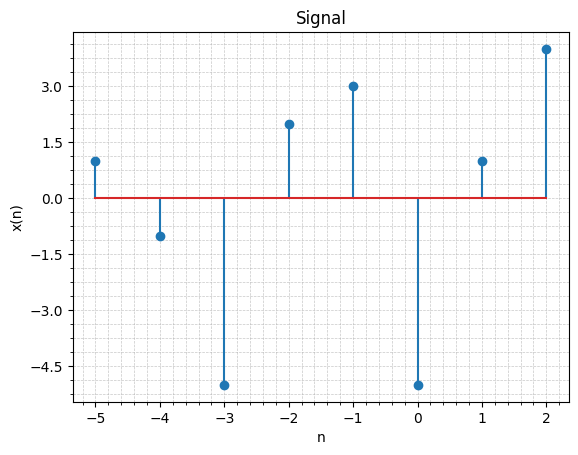

<Axes: title={'center': 'Signal'}, xlabel='n', ylabel='x(n)'>

In [9]:
x = Signal([1, 1, 0, 1, 1], np.arange(-2, 3))
h = Signal([1, -2, -3, 4], np.arange(-3, 1))

x1 = x @ h

x1.stem()

### System 2

$$
x(n) = \left(\frac{1}{4}\right)^{-n} [u(n + 1) - u(n - 4)], h(n) = u(n) - u(n - 5)
$$

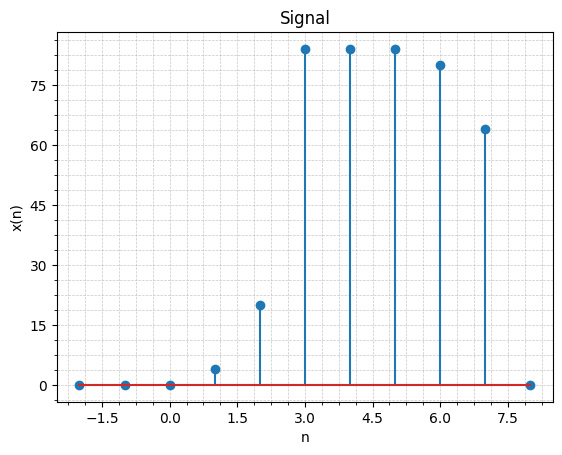

<Axes: title={'center': 'Signal'}, xlabel='n', ylabel='x(n)'>

In [10]:
n = np.arange(-1, 5)
x = Signal(0.25 ** -n, n) * (Signal.from_step(n, 1) - Signal.from_step(n, 4))
h = Signal.from_step(n) - Signal.from_step(n, 5)

x1 = x @ h

x1.stem()

### System 2

$$
x(n) = \frac{n}{4}[u(n) - u(n - 6)], h(n) = 2[u(n + 2) - u(n - 3)]
$$


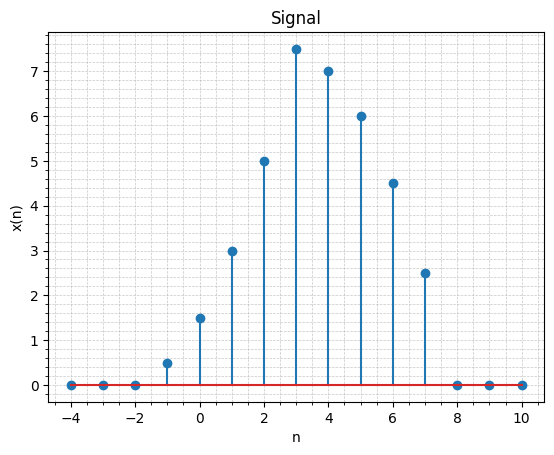

<Axes: title={'center': 'Signal'}, xlabel='n', ylabel='x(n)'>

In [11]:
n = np.arange(-2, 6)
x = Signal(n / 4.0, n) * (Signal.from_step(n) - Signal.from_step(n, 6))
h = 2 * (Signal.from_step(n, -2) - Signal.from_step(n, 3))

x1 = x @ h

x1.stem()